# Fundamental Analysis
This notebook plots various fundamental statistics of different stocks.  
These links were helpful:  
https://simply-python.com/2015/02/13/getting-historical-financial-statistics-of-stock-using-python/
http://stackoverflow.com/questions/40139537/scrape-yahoo-finance-financial-ratios  
https://automatetheboringstuff.com/chapter11/  

In [1]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_stats(stock, stats):
    params = {"formatted": "true",
            "crumb": "AKV/cl0TOgz", # works without so not sure of significance
            "lang": "en-US",
            "region": "US",
            "modules": "defaultKeyStatistics,financialData,calendarEvents",
            "corsDomain": "finance.yahoo.com"}

    link="https://query1.finance.yahoo.com/v10/finance/quoteSummary/%s"%stock
    r = requests.get(link, params=params)
    array = []
    for s in stats:
        try:
            data = r.json()[u'quoteSummary']["result"][0]
            array.append(data[u'%s'%s[0]][u'%s'%s[1]][u'raw'])
        except:
            print 'could not get stat %s for stock %s'%(s,stock)
            return array
    return array

In [3]:
tickers = pd.read_csv('csv/tsx60.csv',delimiter=",")
print tickers["Sector"].unique()
tickers.head()

['Materials' 'Consumer Staples' 'Energy' 'Financials'
 'Telecommunication Services' 'Information Technology' 'Industrials'
 'Consumer Discretionary' 'Utilities' 'Health Care']


,Symbol,Company,Sector
0,AEM.TO,Agnico Eagle Mines Limited,Materials
1,AGU.TO,Agrium Inc.,Materials
2,ATD-B.TO,Alimentation Couche-Tard Inc.,Consumer Staples
3,ARX.TO,ARC Resources Ltd.,Energy
4,BMO.TO,Bank of Montreal,Financials


In [4]:
stats = [('defaultKeyStatistics','beta'),('defaultKeyStatistics','priceToBook'),('defaultKeyStatistics','trailingEps'),('financialData','currentPrice'),('defaultKeyStatistics','shortRatio'),('financialData','quickRatio'),('financialData','returnOnEquity'),('financialData','returnOnAssets')]
#('financialData','debtToEquity')

In [5]:
#stocks = tickers.loc[tickers["Sector"]=="Health Care","Symbol"].values
stocks = tickers["Symbol"].values

results = []
for s in stocks:
    r = get_stats(s,stats)
    if len(r) == len(stats):
        results.append(r)
    else:
        stocks = np.delete(stocks, np.argwhere(stocks==s))

#convert to pandas dataframe
results = pd.DataFrame(results,columns=zip(*stats)[1],index=stocks)
results.head()

could not get stat ('defaultKeyStatistics', 'beta') for stock AEM.TO
could not get stat ('financialData', 'quickRatio') for stock BMO.TO
could not get stat ('financialData', 'quickRatio') for stock BNS.TO
could not get stat ('defaultKeyStatistics', 'priceToBook') for stock BBD-B.TO
could not get stat ('financialData', 'quickRatio') for stock CM.TO
could not get stat ('financialData', 'returnOnEquity') for stock GIL.TO
could not get stat ('financialData', 'quickRatio') for stock NA.TO
could not get stat ('defaultKeyStatistics', 'beta') for stock QSR.TO
could not get stat ('defaultKeyStatistics', 'beta') for stock RCI-B
could not get stat ('financialData', 'quickRatio') for stock RY.TO
could not get stat ('defaultKeyStatistics', 'beta') for stock TCK-B.TO
could not get stat ('financialData', 'quickRatio') for stock TD.TO
could not get stat ('defaultKeyStatistics', 'beta') for stock VRX.TO


,beta,priceToBook,trailingEps,currentPrice,shortRatio,quickRatio,returnOnEquity,returnOnAssets
AGU.TO,0.423799,2.970343,6.222,139.52,3.08,0.682,0.11820,0.04451
ATD-B.TO,0.032133,6.237674,1.988,61.36,3.99,0.883,0.21960,0.08570
ARX.TO,1.168420,2.144882,-0.819,20.43,20.97,0.654,-0.00605,-0.00784
ABX.TO,-0.366030,3.664548,-2.053,23.64,2.46,1.589,-0.23337,0.05015
BCE.TO,0.325981,4.106493,3.160,58.69,21.93,0.414,0.17630,0.06621


In [16]:
#New stocks to check
nstocks = np.asarray(['AW-UN.TO','PZA.TO','BPF-UN.TO','KEG-UN.TO','MTY.TO','SCU.TO','IRG.TO','SRV-UN.TO'])
nresults = []
for s in nstocks:
    r = get_stats(s,stats)
    if len(r) == len(stats):
        nresults.append(r)
    else:
        nstocks = np.delete(nstocks, np.argwhere(nstocks==s))

nresults = pd.DataFrame(nresults,columns=zip(*stats)[1],index=nstocks)
nresults.head()

,beta,priceToBook,trailingEps,currentPrice,shortRatio,quickRatio,returnOnEquity,returnOnAssets
AW-UN.TO,1.218030,4.794177,1.480,38.20,1.15,2.288,0.15475,0.09161
PZA.TO,0.834333,1.966716,0.869,17.49,11.64,2.823,0.09782,0.06306
BPF-UN.TO,0.927251,1.765611,1.853,22.96,12.71,16.596,0.14492,0.06310
KEG-UN.TO,0.584462,3.075096,-0.016,20.72,0.25,4.219,-0.00217,0.07591
MTY.TO,0.591468,5.123958,1.440,47.95,19.57,0.330,0.16053,0.05850


In [17]:
#Create new features
#P/E Ratio
#results["PE Ratio"] = results["currentPrice"]/results["trailingEps"]
nresults["PE Ratio"] = nresults["currentPrice"]/nresults["trailingEps"]

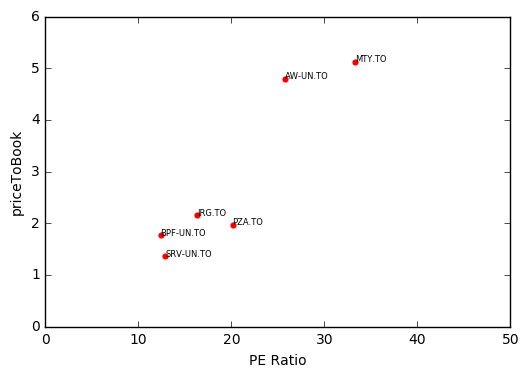

In [22]:
def plot_labels(a,x,y,size,xlo=None,xhi=None,ylo=None,yhi=None):
    arr = a.loc[(a[y]>ylo)&(a[y]<yhi)&(a[x]>xlo)&(a[x]<xhi)]
    arrx, arry, arrnames = arr[x].values, arr[y].values, arr.index.values
    for i in range(len(arrx)):
        plt.text(arrx[i], arry[i], arrnames[i], size=size)

x = "PE Ratio"
y = "priceToBook"
xlo,xhi = 0, 50
#ylo,yhi = 0, 30
plt.xlim([xlo,xhi])
#plt.ylim([ylo,yhi])

#baseline results
#plt.scatter(results[x], results[y], lw=0, s=10)
#plot_labels(results,x,y,6,xlo,xhi,ylo,yhi)

#new stocks
plt.scatter(nresults[x], nresults[y], lw=0, color='red', s=20)
plot_labels(nresults,x,y,6,xlo,xhi,ylo,yhi)

#labels and ranges

plt.xlabel(x)
plt.ylabel(y)
plt.savefig("plots/%s_v_%s.png"%(x,y))

## Where Each statistic is located

In [49]:
pp(data)

{u'calendarEvents': {u'dividendDate': {u'fmt': u'2016-11-10',
                                       u'raw': 1478736000},
                     u'earnings': {u'earningsAverage': {u'fmt': u'3.22',
                                                        u'raw': 3.22},
                                   u'earningsDate': [{u'fmt': u'2017-01-31',
                                                      u'raw': 1485820800}],
                                   u'earningsHigh': {u'fmt': u'3.77',
                                                     u'raw': 3.77},
                                   u'earningsLow': {u'fmt': u'3.11',
                                                    u'raw': 3.11},
                                   u'revenueAverage': {u'fmt': u'77.39B',
                                                       u'longFmt': u'77,386,500,000',
                                                       u'raw': 77386500000},
                                   u'revenueHigh': {u'fmt': u'86.73B',

# More sophisticated stuff below that is harder but allows more control...
Haven't quite figured this out yet...

In [2]:
import requests
import urllib2
from bs4 import BeautifulSoup  

In [23]:
website = 'https://ca.finance.yahoo.com/quote/AAPL'
page = urllib2.urlopen(website).read()
soup = BeautifulSoup(page, 'html.parser')
#soup = (page, 'html.parser')  

In [16]:
#values = soup.findAll("td", "Ta(end) Fw(b)")
values = soup.find("td", {'data-test':'OPEN-value'})
values

<td class="Ta(end) Fw(b)" data-reactid="348" data-test="OPEN-value">118.77</td>

In [17]:
values.string

u'118.77'

In [28]:
website = "https://ca.finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL"
page = urllib2.urlopen(website).read()
soup = BeautifulSoup(page, 'html.parser')

In [34]:
values = soup.findAll("main",{'class':'Mstart(a) Mend(a)'})
values

[]